##                                                      Life Expectancy Prediction

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import plotly.express as px

### Importing Data

In [2]:
df=pd.read_csv(r'C:\Users\VAIBHAV\Downloads\life_exp.csv')

### Data Exploration

In [3]:
# shape of the data
df.shape

(2938, 22)

In [4]:
print('Rows:',df.shape[0])
print('Columns:',df.shape[1])

Rows: 2938
Columns: 22


In [5]:
# displaying the first 5 rows of dataset
df.head()

,Country,Year,Status,Life_expect,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959,3696958,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599,18.2,18.2,0.454,9.5


Here our target variable is Life Expectancy.

In this dataset we will be using multiple linear regression algorithm which will establish a relationship between
dependent variable (Life Expectancy)and multiple independent variables.

This will identify the strength of relationship between the variables and will help to predict the value of dependent varible based
on the values of independent variables.

In [6]:
# to display all the columns
pd.set_option('display.max_columns',None)

In [7]:
# displaying the last 3 rows of dataset
df.tail(3)

,Country,Year,Status,Life_expect,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.34834,125525,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,25.5,39,78.0,7.10,78.0,43.5,547.3588785,12222251,11.0,11.2,0.434,9.8


##### df.sample(frac=0.05)     # this will display 5% percent of the total dataset
##### df.sample(frac=0.1)      # this will display 10% percent of the total dataset

In [8]:
# dividing numerical and categorical columns 
df_num=df.select_dtypes(include='number')
df_cat=df.select_dtypes(include='object')

In [9]:
df_num.columns

Index(['Year', 'Life_expect', 'Adult_Mortality', 'infant_deaths', 'Alcohol',
       'percentage_expenditure', 'HepatitisB', 'Measles', 'BMI',
       'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV_AIDS', 'thinness_1-19_years', 'thinness_5-9_years',
       'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [10]:
df_cat.columns

Index(['Country', 'Status', 'GDP', 'Population'], dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expect                      2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   HepatitisB                       2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under_five_deaths                2938 non-null   int64  
 12  Polio               

The GDP and Population has numerical values but here we can see its datatype is showing as object
So we can say that there are some wrongly entered values in these columns

In [12]:
lst_un=['Country','Year','Status']
for i in lst_un:
    print(i,df[i].unique())
    print('*********************************************')

Country ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Islamic Repub

In [13]:
df['GDP'].value_counts()

GDP
-              46
584.25921       1
354.8185998     1
358.99731       1
43.646498       1
               ..
4274.376857     1
4142.869175     1
3725.63221      1
2964.47734      1
547.3588785     1
Name: count, Length: 2491, dtype: int64

In [14]:
df['Population'].value_counts()

Population
-           106
444           4
718239        2
1141          2
26868         2
           ... 
4136          1
482           1
43            1
3978          1
12222251      1
Name: count, Length: 2279, dtype: int64

In [15]:
#'-' is not a valid data and should be replaced with nan 
# Replacing '-' with Nan values

df.replace('-',np.nan,inplace=True)

In [16]:
#### Converting datatype of GDP and Population feature to float as both these columns have numerical values

df['GDP']=df['GDP'].astype('float64')
df['Population']=df['Population'].astype('float64')

In [17]:
df.info()
# Datatypes of GDP and Population columns have changed from object to float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expect                      2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   HepatitisB                       2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under_five_deaths                2938 non-null   int64  
 12  Polio               

In [18]:
# Looking for null values
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expect                         10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
HepatitisB                         553
Measles                              0
BMI                                 34
under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV_AIDS                             0
GDP                                448
Population                         652
thinness_1-19_years                 34
thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [19]:
df_num=df.select_dtypes(include='number')
df_cat=df.select_dtypes(include='object')

In [20]:
# filling null values using forwardfill(ffill)
# df.fillna(method='ffill',inplace=True)

In [21]:
# filling null values using median

lst=['Life_expect','Adult_Mortality','Alcohol','HepatitisB','under_five_deaths','BMI','Polio','Total_expenditure','Diphtheria','GDP','Population',\
     'thinness_1-19_years','thinness_5-9_years','Income_composition_of_resources','Income_composition_of_resources','Schooling']

In [22]:
for i in lst:
    df[i]=df[i].fillna(df[i].median())

In [23]:
df.isnull().sum()
# all null values have been filled in the dataset

Country                            0
Year                               0
Status                             0
Life_expect                        0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
HepatitisB                         0
Measles                            0
BMI                                0
under_five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV_AIDS                           0
GDP                                0
Population                         0
thinness_1-19_years                0
thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

In [24]:
## checking for duplicates

dupl=df.duplicated().sum()
dupl

## No duplicates found

0

In [25]:
df_num=df.select_dtypes(include='number')
df_cat=df.select_dtypes(include='object')

In [26]:
df_cat.columns

Index(['Country', 'Status'], dtype='object')

In [27]:
# statistcal summary of numerical columns
df_num.describe()

,Year,Life_expect,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.234717,164.725664,30.303948,4.546875,738.251295,83.022124,2419.592240,38.381178,42.035739,82.617767,5.924098,82.393125,1.742103,6611.523863,1.023085e+07,4.821886,4.852144,0.630362,12.009837
std,4.613841,9.509115,124.086215,117.926501,3.921946,1987.914858,22.996984,11467.272489,19.935375,160.445548,23.367166,2.400770,23.655562,5.077785,13296.603449,5.402242e+07,4.397621,4.485854,0.205140,3.265139
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [28]:
# statistcal summary of categorical columns
df_cat.describe()

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


## Data Visualisation

<Figure size 640x480 with 0 Axes>

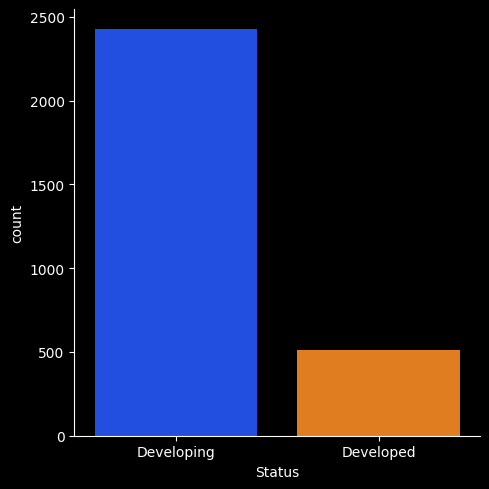

In [29]:
plt.style.use('dark_background')
plt.figure()
sns.catplot(data=df,x='Status',kind='count',palette='bright')

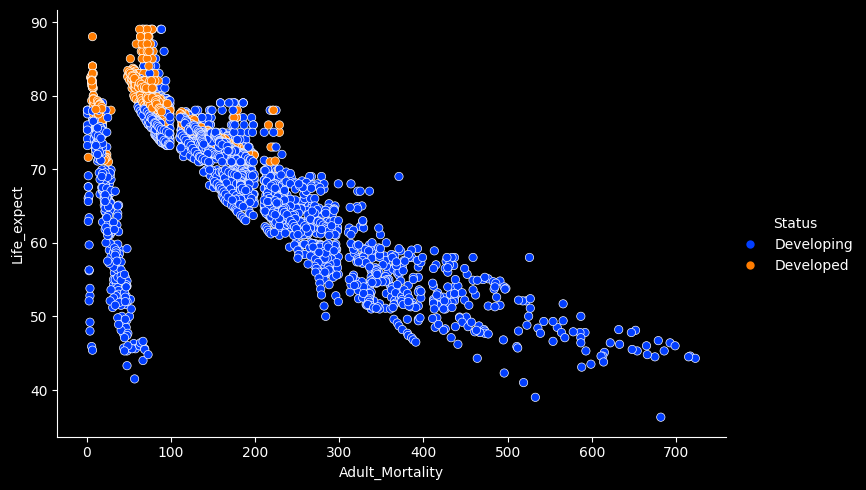

In [30]:
sns.relplot(x ='Adult_Mortality',y ='Life_expect',hue='Status',data =df,height =5,aspect=1.5,palette='bright') 
plt.show()
# countries having  less adult mortality have high life expectancy
# developed countries has significantly higher life expectancy as compared to developing countries

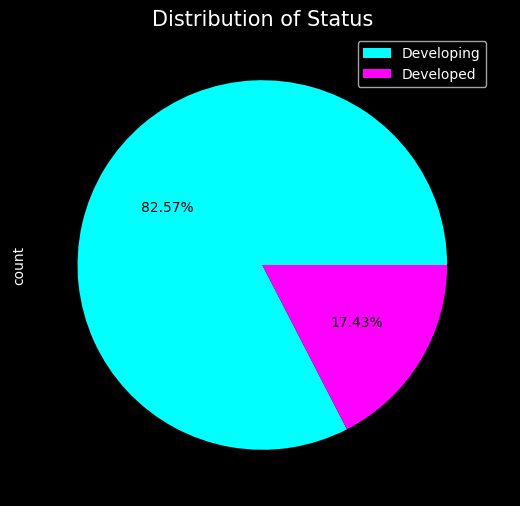

In [31]:
plt.figure(figsize=(7,6))
df['Status'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f%%',cmap='cool')
plt.title('Distribution of Status',fontsize=15)
plt.legend(['Developing','Developed'])
plt.show()

Text(0.5, 1.0, 'Distribution of life expectancy')

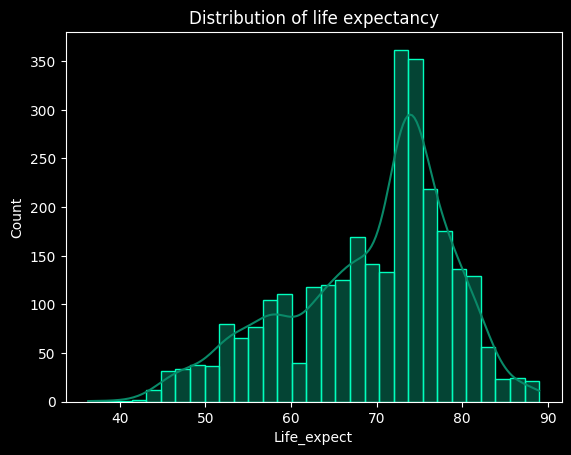

In [32]:
sns.histplot(df['Life_expect'], kde=True,color='#098968',edgecolor='#00FFBD')
plt.title('Distribution of life expectancy')

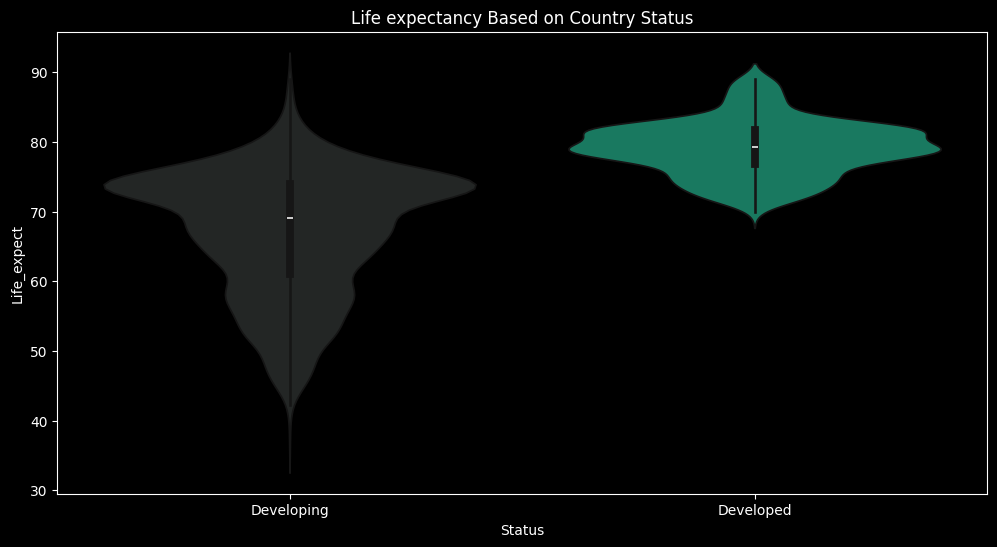

In [33]:
plt.style.use('dark_background')
plt.figure(figsize=(12, 6))
sns.violinplot( data=df,x='Status', y='Life_expect',color='#098968',hue='Status')
plt.title('Life expectancy Based on Country Status')

plt.show()
## Developed countries has maximum life expectancy

<Axes: xlabel='Year', ylabel='Life_expect'>

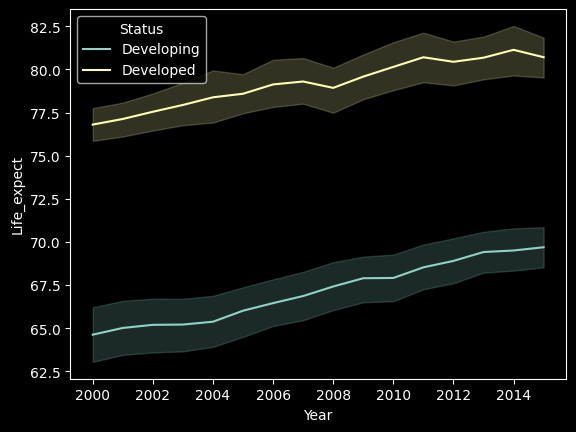

In [34]:
sns.lineplot(data=df,x='Year',y='Life_expect',hue='Status')

<Axes: ylabel='Life_expect'>

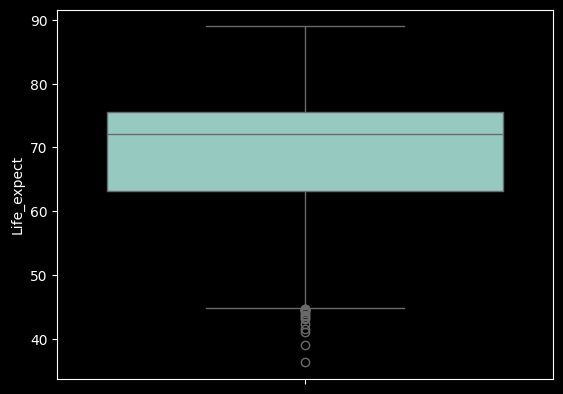

In [35]:
# boxplot
sns.boxplot(df['Life_expect'])

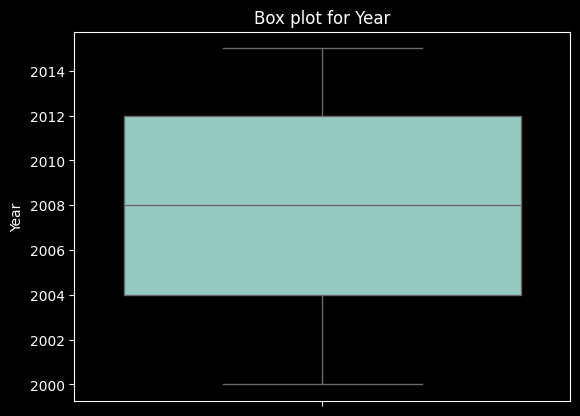

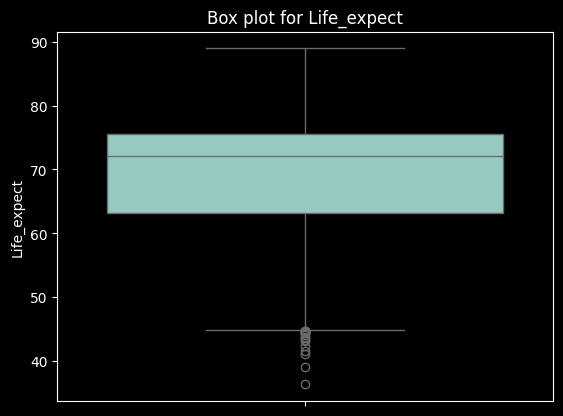

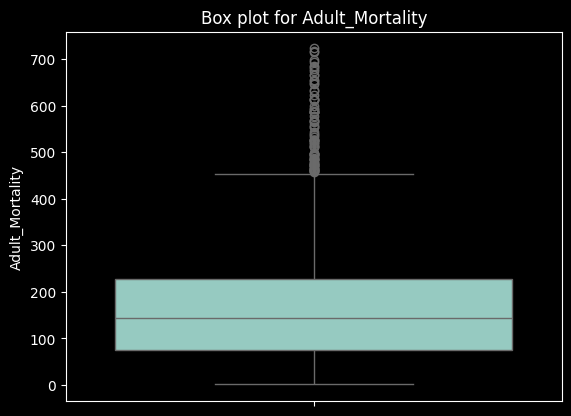

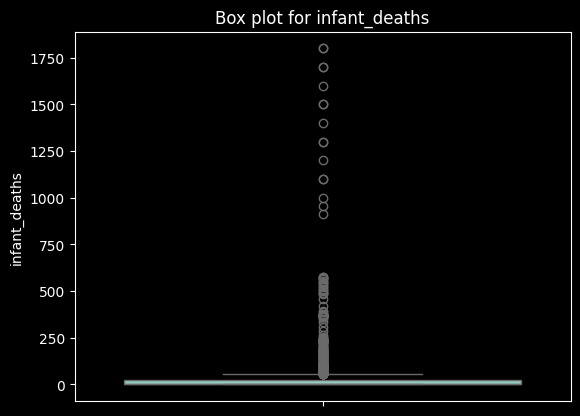

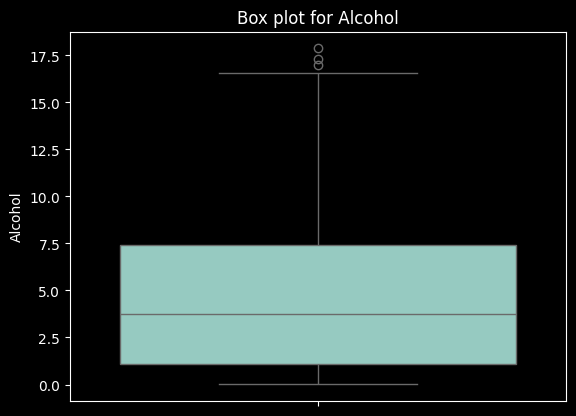

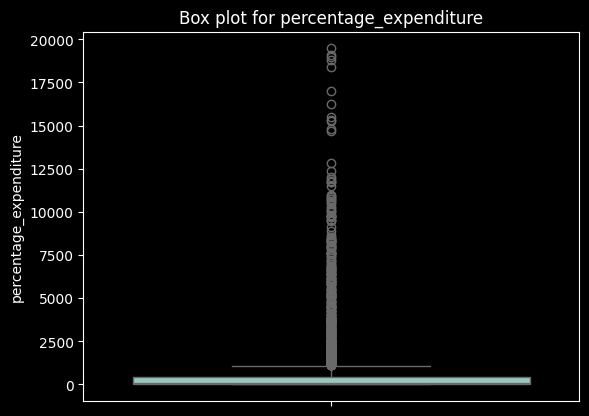

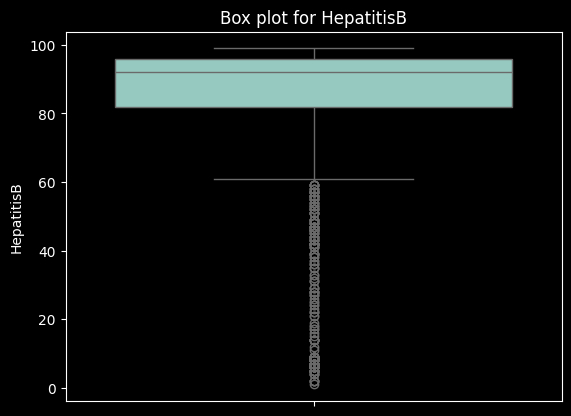

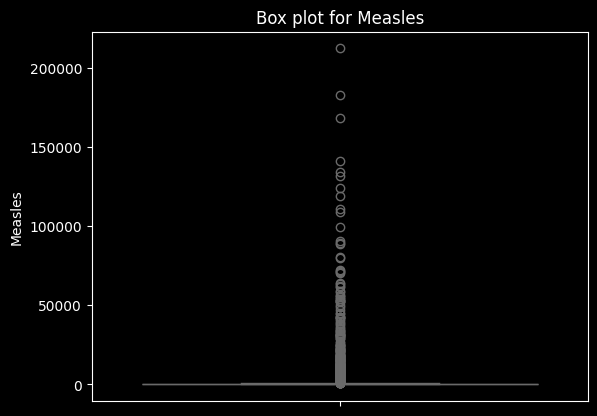

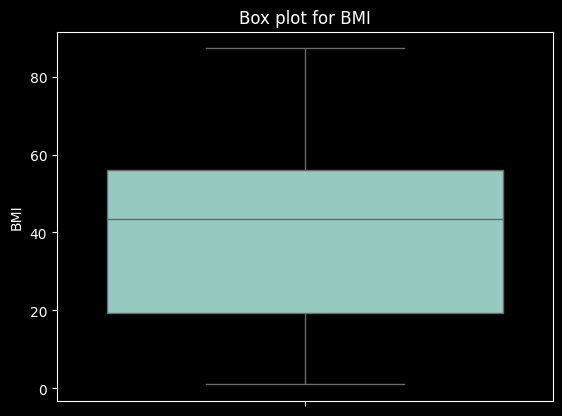

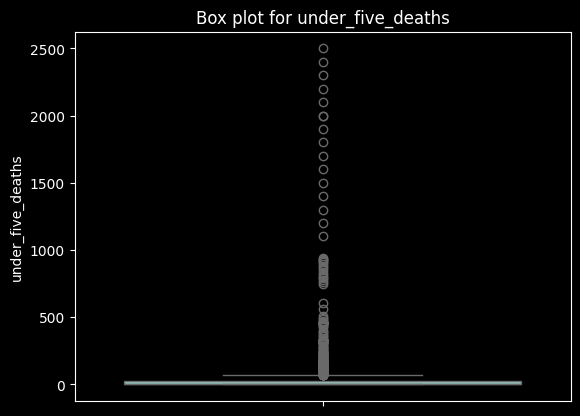

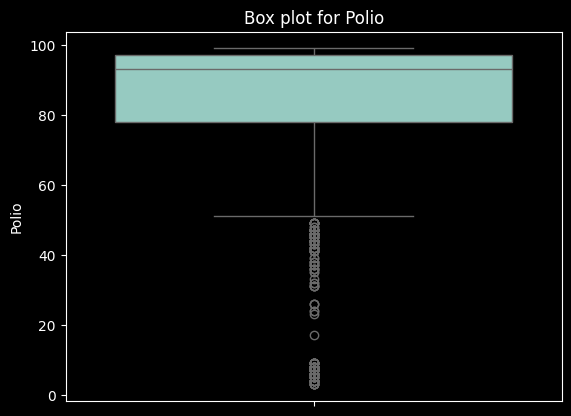

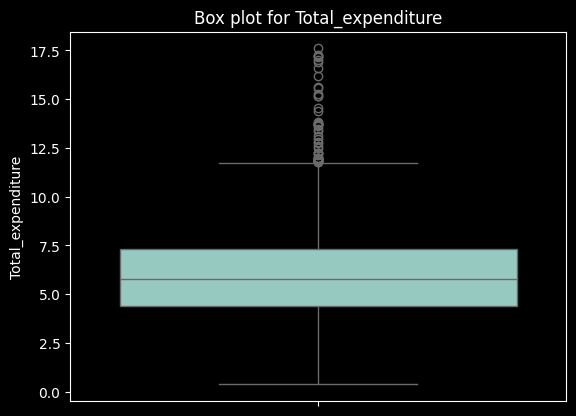

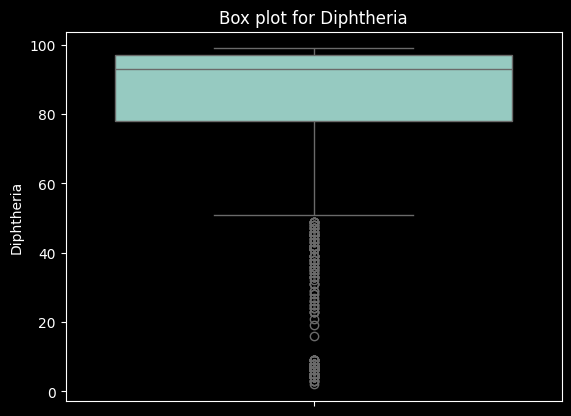

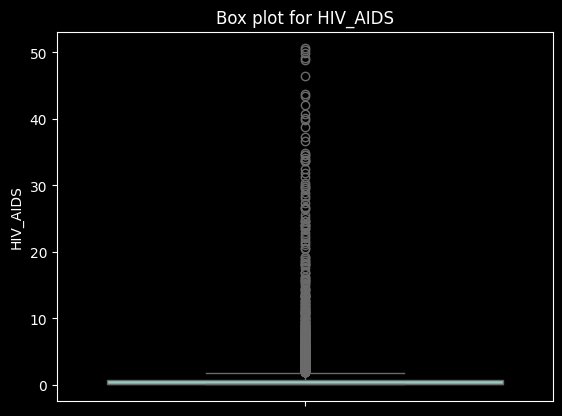

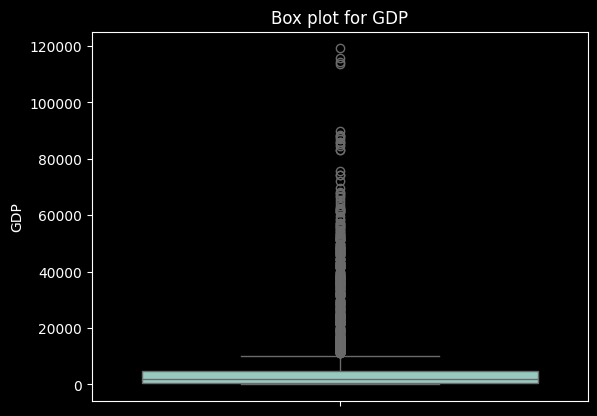

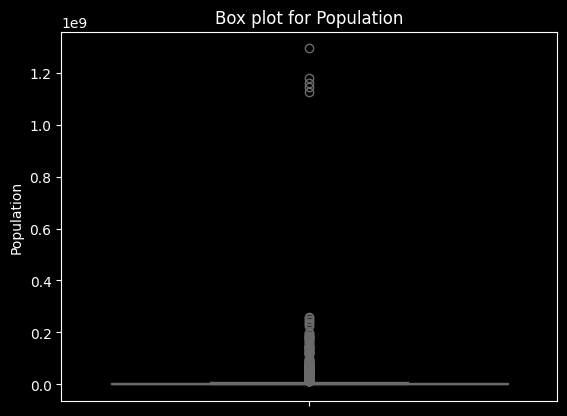

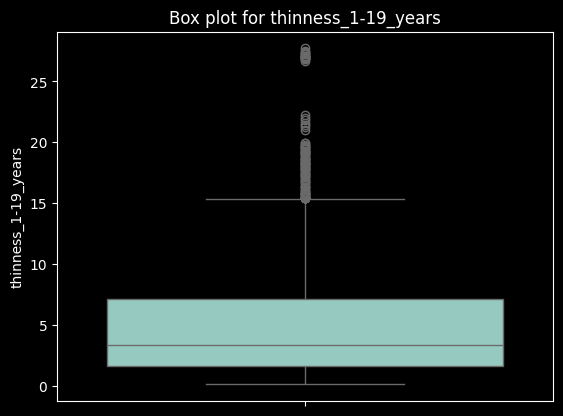

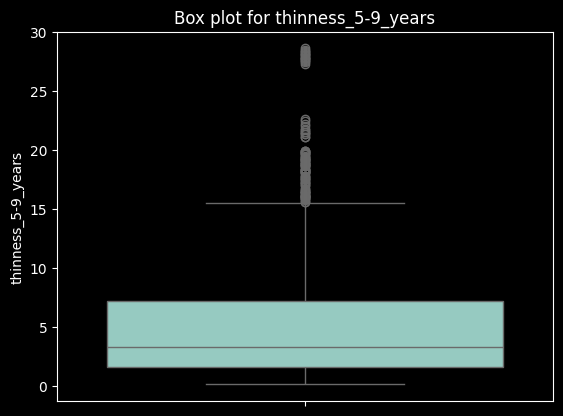

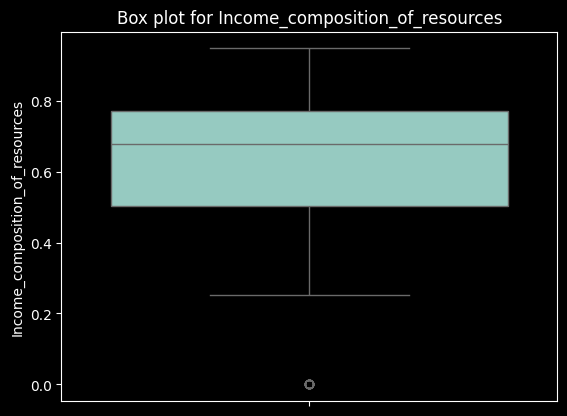

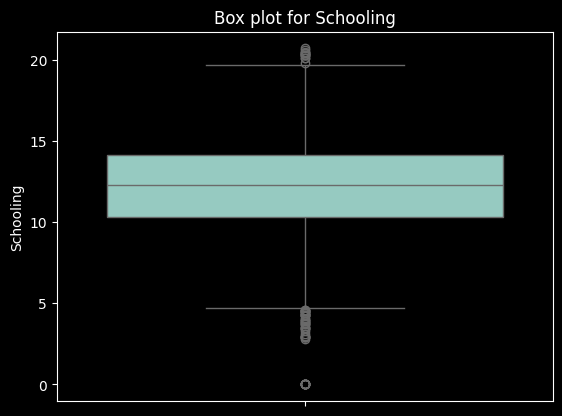

In [36]:
# boxplot
for i in df_num.columns:
    plt.figure()
    sns.boxplot(df[i])
    plt.title(f'Box plot for {i}')
    plt.show()

In [37]:
# fig=px.line(df.sort_values(by='Year'),x='Year',y='Life_expect',animation_frame='Country',animation_group='Year',\
#             color='Country',markers=True,template='plotly_dark',title='<b> Country wise Life Expectancy over Years')
# fig.show()

In [38]:
# heatmap
# plt.figure(figsize=(15,10))
# sns.heatmap(df.corr(),annot=True,cmap='Greens')
# plt.show()

In [39]:
df_ind=df[df['Country']=='India']
df_ind.head(3)

,Country,Year,Status,Life_expect,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
1186,India,2015,Developing,68.3,181.0,910,3.755,0.000000,87.0,90387,18.7,1100,86.0,5.755,87.0,0.2,1613.188780,1.395398e+06,26.7,27.3,0.615,11.6
1187,India,2014,Developing,68.0,184.0,957,3.070,86.521539,79.0,79563,18.1,1200,84.0,4.690,85.0,0.2,1573.118890,1.293859e+09,26.8,27.4,0.607,11.6
1188,India,2013,Developing,67.6,187.0,1000,3.110,67.672304,7.0,13822,17.5,1300,82.0,4.530,83.0,0.2,1452.195373,1.278562e+08,26.8,27.5,0.599,11.5


In [40]:
x=df_ind['Year'].values
y=df_ind['Life_expect'].values

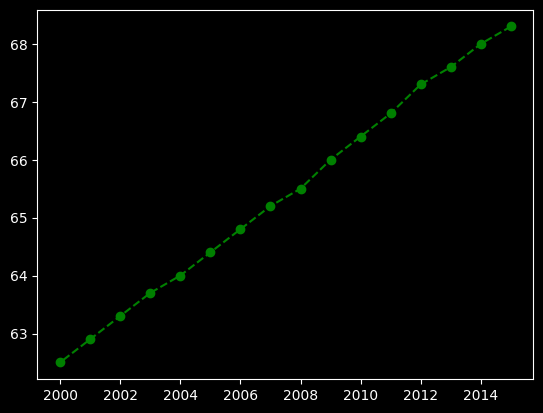

In [41]:
# Life expectancy of india from 2000 - 2015
plt.style.use('dark_background')
plt.plot(x,y,'o--g')
plt.show()

In [42]:
df_gb=df.drop(['Year','Status'],axis=1).groupby('Country').mean()
df_gb.head(3)
# from this dataframe we can see the average life expectancy of all the countries from 2000 to 2015

,Life_expect,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.5625,2362.250,15.51875,107.5625,48.375,8.252500,52.3125,0.1,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.2125
Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.0000,53.375,49.06875,0.9375,98.125,5.945625,98.0625,0.1,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.1375
Algeria,73.61875,108.1875,20.3125,0.615938,236.185241,81.5000,1943.875,48.74375,23.5000,91.750,4.675937,91.8750,0.1,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.7125


In [43]:
# looking at maximum,minimum and average life expectancy
print('Maximum life Expectancy:',df['Life_expect'].max())
print('Minimum life Expectancy:',df['Life_expect'].min())
print('Average life Expectancy:',df['Life_expect'].mean())

Maximum life Expectancy: 89.0
Minimum life Expectancy: 36.3
Average life Expectancy: 69.23471749489448


<Figure size 640x480 with 0 Axes>

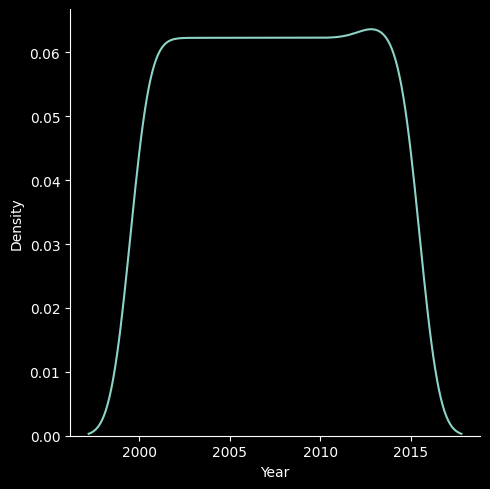

<Figure size 640x480 with 0 Axes>

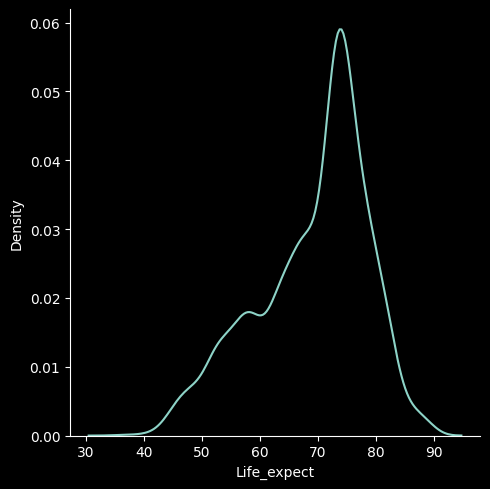

<Figure size 640x480 with 0 Axes>

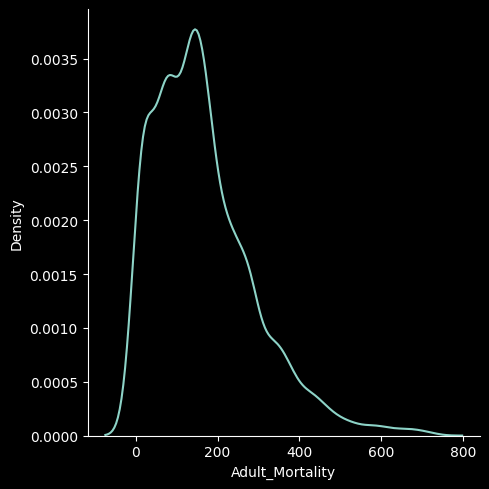

<Figure size 640x480 with 0 Axes>

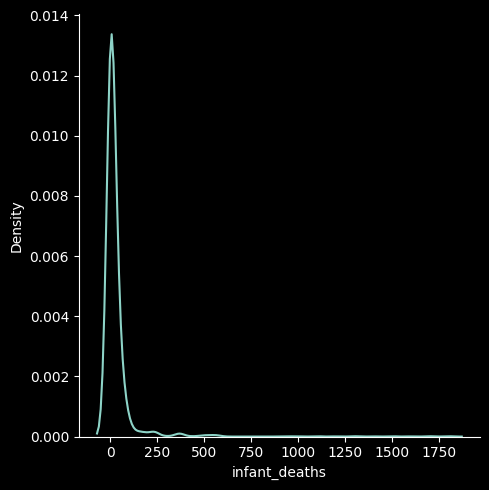

<Figure size 640x480 with 0 Axes>

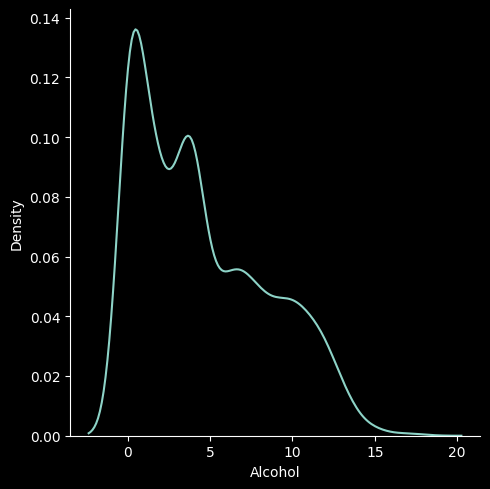

<Figure size 640x480 with 0 Axes>

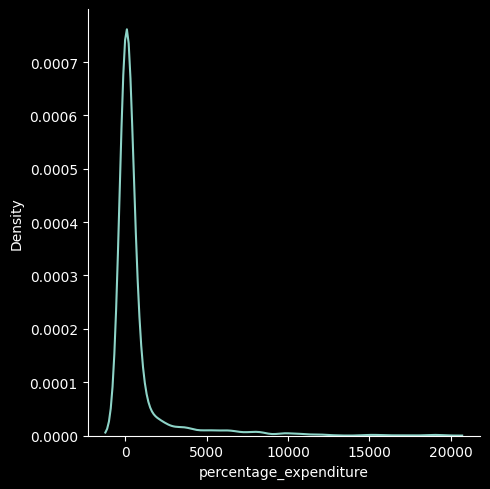

<Figure size 640x480 with 0 Axes>

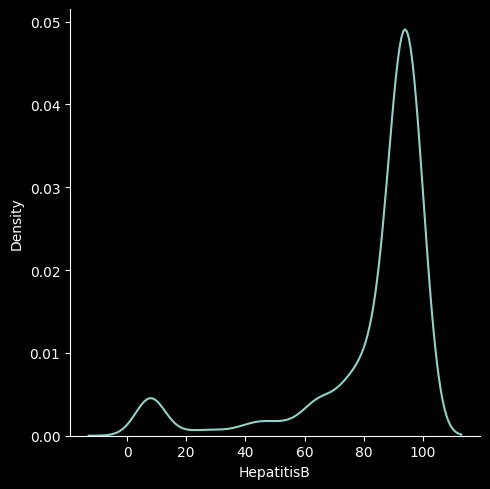

<Figure size 640x480 with 0 Axes>

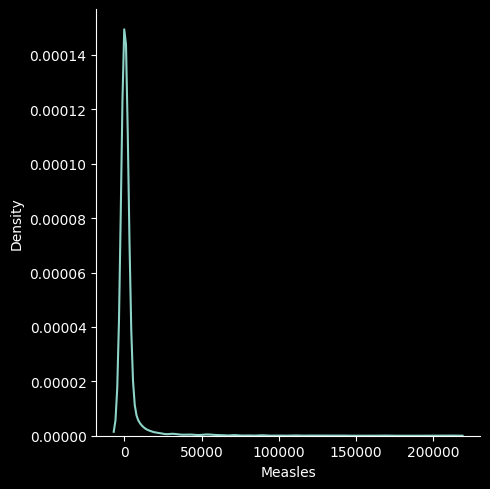

<Figure size 640x480 with 0 Axes>

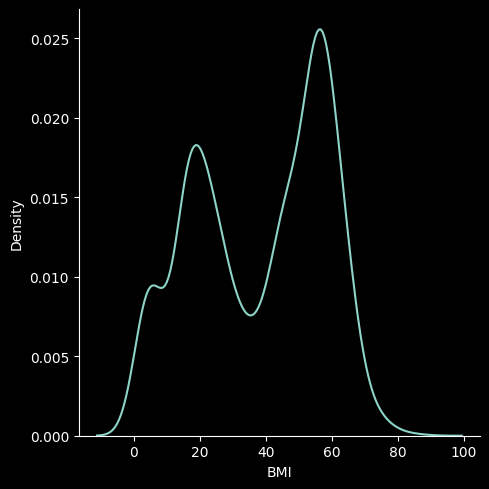

<Figure size 640x480 with 0 Axes>

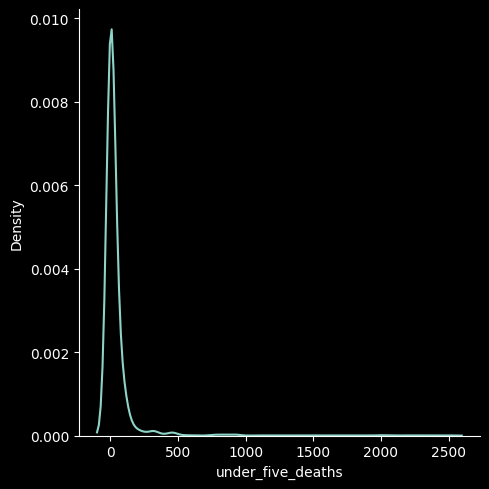

<Figure size 640x480 with 0 Axes>

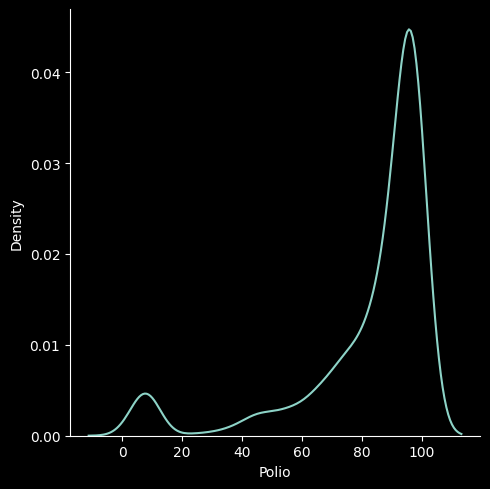

<Figure size 640x480 with 0 Axes>

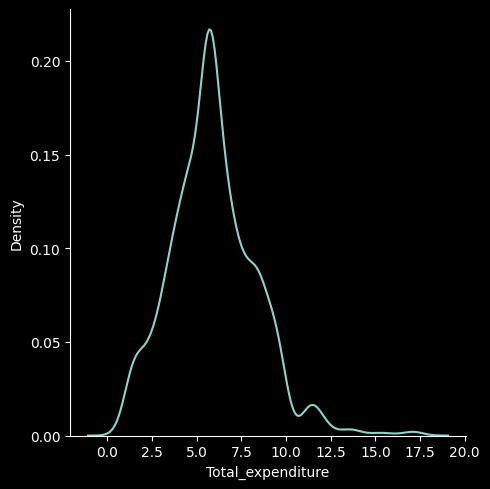

<Figure size 640x480 with 0 Axes>

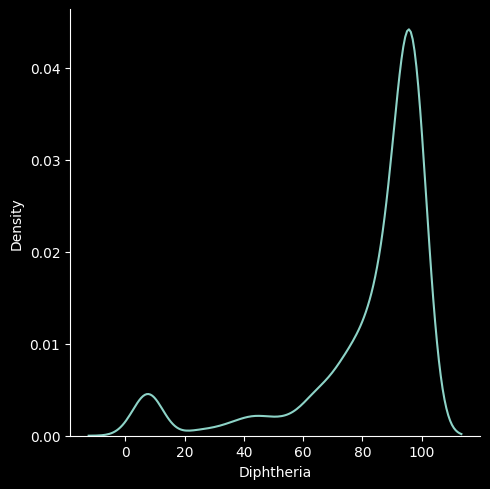

<Figure size 640x480 with 0 Axes>

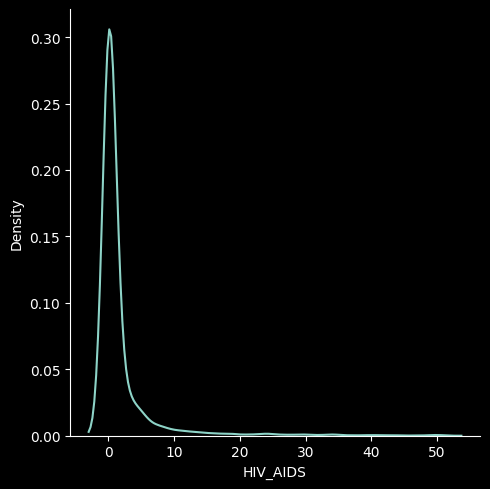

<Figure size 640x480 with 0 Axes>

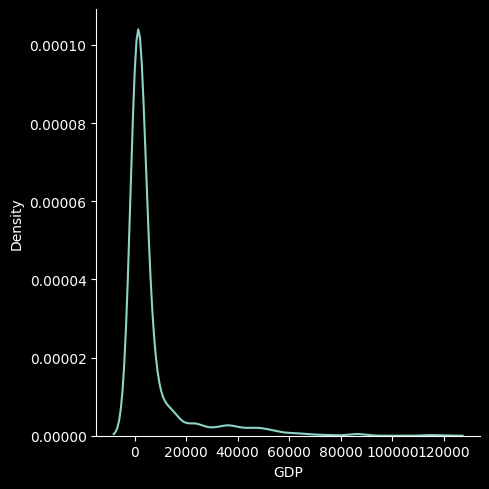

<Figure size 640x480 with 0 Axes>

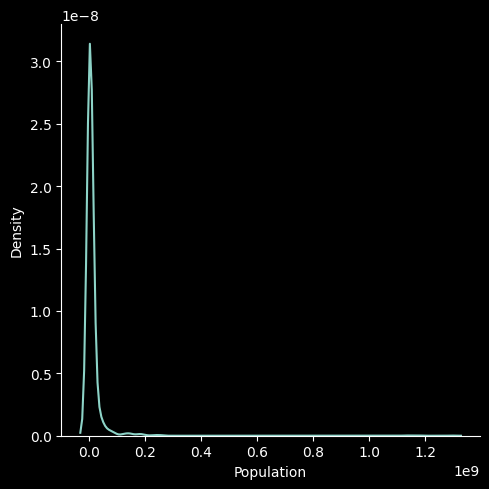

<Figure size 640x480 with 0 Axes>

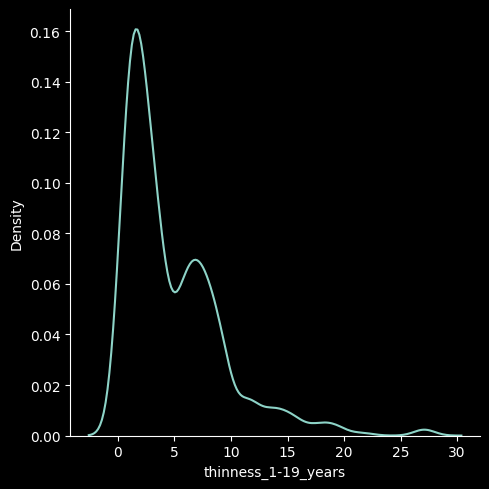

<Figure size 640x480 with 0 Axes>

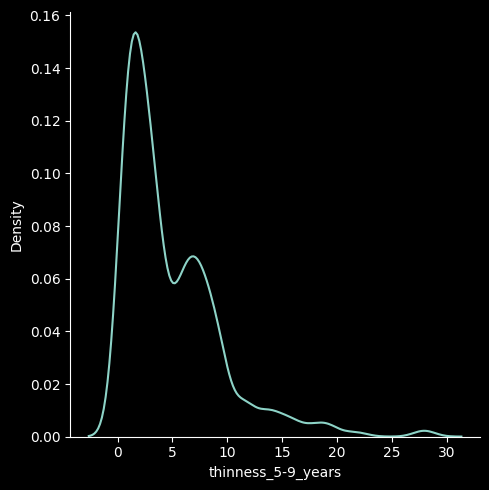

<Figure size 640x480 with 0 Axes>

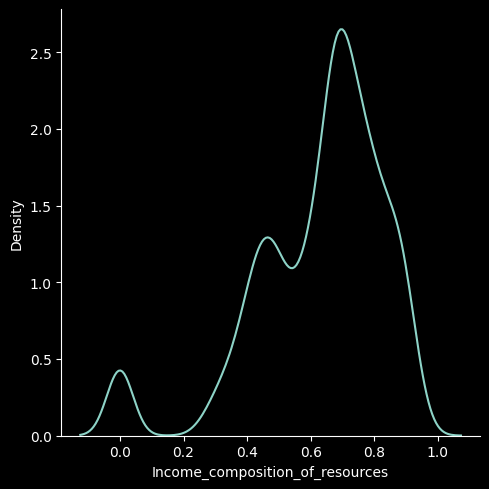

<Figure size 640x480 with 0 Axes>

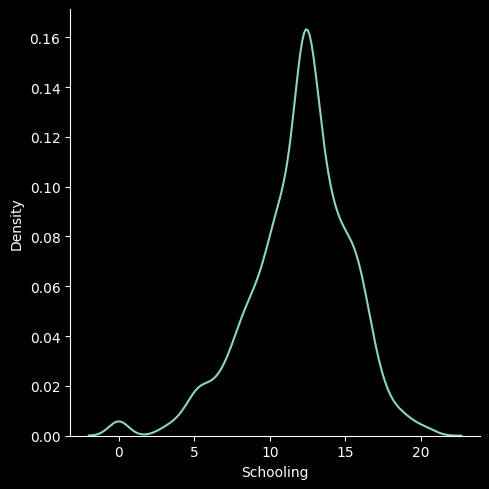

In [44]:
# distribution of numerical columns
for i in df_num.columns:
    plt.figure()
    sns.displot(df[i],kind='kde')
    plt.show()

In [45]:
# skewness
from scipy.stats import skew
for i in df_num.columns:
    print(i,':',skew(df[i]))

Year : -0.00640575475736738
Life_expect : -0.6420627886057926
Adult_Mortality : 1.177297957079675
infant_deaths : 9.781965494027151
Alcohol : 0.6492464598810169
percentage_expenditure : 4.649675899609289
HepatitisB : -2.2805323384822267
Measles : 9.436510978085607
BMI : -0.22903982551937418
under_five_deaths : 9.490216250784258
Polio : -2.10783252934917
Total_expenditure : 0.660770643209122
Diphtheria : -2.0825016566936276
HIV_AIDS : 5.393356658787256
GDP : 3.5419463472945982
Population : 17.963659758332124
thinness_1-19_years : 1.7286132674805903
thinness_5-9_years : 1.7947768345535493
Income_composition_of_resources : -1.2119068049052284
Schooling : -0.6347273563646453


In [46]:
# sqrt tranformation for columns which has higher number of skewness
lst1=['infant_deaths','percentage_expenditure','HepatitisB','Measles','Polio','Diphtheria','GDP','Population']
for i in lst1:
    df[i]=np.sqrt(df[i])

In [47]:
from scipy.stats import skew
for i in df_num.columns:
    print(i,':',skew(df[i]))

Year : -0.00640575475736738
Life_expect : -0.6420627886057926
Adult_Mortality : 1.177297957079675
infant_deaths : 3.5838413153049844
Alcohol : 0.6492464598810169
percentage_expenditure : 2.3556223469367197
HepatitisB : -2.7569360882223424
Measles : 4.170215101908666
BMI : -0.22903982551937418
under_five_deaths : 9.490216250784258
Polio : -2.6701068252592686
Total_expenditure : 0.660770643209122
Diphtheria : -2.611358709760813
HIV_AIDS : 5.393356658787256
GDP : 1.971182056023572
Population : 5.195391050110727
thinness_1-19_years : 1.7286132674805903
thinness_5-9_years : 1.7947768345535493
Income_composition_of_resources : -1.2119068049052284
Schooling : -0.6347273563646453


In [48]:
# df.head(3)

In [49]:
## scaling 
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df['Adult_Mortality']=ss.fit_transform(df[['Adult_Mortality']])
df['percentage_expenditure']=ss.fit_transform(df[['percentage_expenditure']])
df['GDP']=ss.fit_transform(df[['GDP']])
df['Population']=ss.fit_transform(df[['Population']])

In [50]:
## Label encoding for numerical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Country']=le.fit_transform(df['Country'])
df['Status']=le.fit_transform(df['Status'])

In [51]:
df.head(3)

,Country,Year,Status,Life_expect,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,0,2015,1,65.0,0.792119,7.874008,0.01,-0.353061,8.062258,33.970576,19.1,83,2.449490,8.16,8.062258,0.1,-0.645568,1.519511,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,0.856601,8.000000,0.01,-0.347025,7.874008,22.181073,18.6,86,7.615773,8.18,7.874008,0.1,-0.635026,-0.522497,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,0.832421,8.124038,0.01,-0.347838,8.000000,20.736441,18.1,89,7.874008,8.13,8.000000,0.1,-0.628100,1.451174,17.7,17.7,0.470,9.9


### Seperating x and y

In [52]:
# separating dependent(Target)variable and independent variables
x=df.drop('Life_expect',axis=1)
y=df['Life_expect']

In [53]:
x.head(3)

,Country,Year,Status,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,0,2015,1,0.792119,7.874008,0.01,-0.353061,8.062258,33.970576,19.1,83,2.449490,8.16,8.062258,0.1,-0.645568,1.519511,17.2,17.3,0.479,10.1
1,0,2014,1,0.856601,8.000000,0.01,-0.347025,7.874008,22.181073,18.6,86,7.615773,8.18,7.874008,0.1,-0.635026,-0.522497,17.5,17.5,0.476,10.0
2,0,2013,1,0.832421,8.124038,0.01,-0.347838,8.000000,20.736441,18.1,89,7.874008,8.13,8.000000,0.1,-0.628100,1.451174,17.7,17.7,0.470,9.9


In [54]:
y.head(3)

0    65.0
1    59.9
2    59.9
Name: Life_expect, dtype: float64

In [55]:
## Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)

In [56]:
var=x_scaled
df_var=pd.DataFrame()
df_var['VIF']=[variance_inflation_factor(var,i) for i in range(var.shape[1])]
df_var['Features']=x.columns
df_var
## VIF more than 10 may indicate multicollinearity          

,VIF,Features
0,1.038954,Country
1,1.207833,Year
2,1.872728,Status
3,1.772334,Adult_Mortality
4,7.247864,infant_deaths
5,1.906754,Alcohol
6,5.115832,percentage_expenditure
7,1.249068,HepatitisB
8,1.849165,Measles
9,1.787693,BMI


## Model building

In [57]:
## Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

## Linear regression

In [58]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [59]:
y_pred_tr=LR.predict(x_train)
y_pred_tst=LR.predict(x_test)

In [60]:
## Testing and Training Accuracy
from sklearn.metrics import r2_score
print('Accuracy score on Training Data (Linear Regression):',r2_score(y_train,y_pred_tr)*100)
print('Accuracy score on Testing Data (Linear Regression):',r2_score(y_test,y_pred_tst)*100)

Accuracy score on Training Data (Linear Regression): 81.73236633465265
Accuracy score on Testing Data (Linear Regression): 82.27198570231116


In [61]:
from sklearn import metrics
print('MSE:',metrics.mean_squared_error(y_test,y_pred_tst))
print('RMSE is: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred_tst)))
print('MAE is: ',metrics.mean_absolute_error(y_test,y_pred_tst))
print('MAPE is: ',metrics.mean_absolute_percentage_error(y_test,y_pred_tst))

MSE: 15.32425505998104
RMSE is:  3.914620678939537
MAE is:  2.9918082026553785
MAPE is:  0.044583248518897944


## Prediction on scaled data

In [62]:
## Prediction on scaled data
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train_s=ss.fit_transform(x_train)
x_test_s=ss.transform(x_test)

In [63]:
## fitting the model on scaled data
LR.fit(x_train_s,y_train)

LinearRegression()

In [64]:
# predicting values fro x_train and x_test
y_pred_tr=LR.predict(x_train_s)
y_pred_tst=LR.predict(x_test_s)

In [65]:
## Testing and Training Accuracy on scaled data
from sklearn.metrics import r2_score
print('Accuracy score on Training Data (Linear Regression):',r2_score(y_train,y_pred_tr)*100)
print('Accuracy score on Testing Data (Linear Regression):',r2_score(y_test,y_pred_tst)*100)

Accuracy score on Training Data (Linear Regression): 81.73236633465265
Accuracy score on Testing Data (Linear Regression): 82.27198570231116


In [66]:
# cross validation score
from sklearn.model_selection import cross_val_score
print('For Training data:',cross_val_score(LR,x_train_s,y_train,cv=5,scoring='r2'))

For Training data: [0.7850837  0.81261752 0.82022509 0.81284736 0.81719073]


## Polynomial Regression

In [67]:
from sklearn.preprocessing import PolynomialFeatures
Pol_r=PolynomialFeatures(degree=2)
x_train_pol=Pol_r.fit_transform(x_train)
x_test_pol=Pol_r.fit_transform(x_test)

In [68]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train_pol,y_train)

LinearRegression()

In [69]:
# predicting values fro x_train_pol and x_test_pol
y_pred_tr=LR.predict(x_train_pol)
y_pred_tst=LR.predict(x_test_pol)

In [70]:
## Testing and Training Accuracy on Polynomial Regression
from sklearn.metrics import r2_score
print('Accuracy score on Training Data (Polynomial Regression):',r2_score(y_train,y_pred_tr)*100)
print('Accuracy score on Testing Data (Polynomial Regression):',r2_score(y_test,y_pred_tst)*100)

Accuracy score on Training Data (Polynomial Regression): 93.40539189744983
Accuracy score on Testing Data (Polynomial Regression): 91.3181603107864


In [71]:
from sklearn import metrics
print('MSE:',metrics.mean_squared_error(y_test,y_pred_tst))
print('RMSE is: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred_tst)))
print('MAE is: ',metrics.mean_absolute_error(y_test,y_pred_tst))
print('MAPE is: ',metrics.mean_absolute_percentage_error(y_test,y_pred_tst))

MSE: 7.504660338903287
RMSE is:  2.739463512971707
MAE is:  1.9863142779405298
MAPE is:  0.029533323867221406


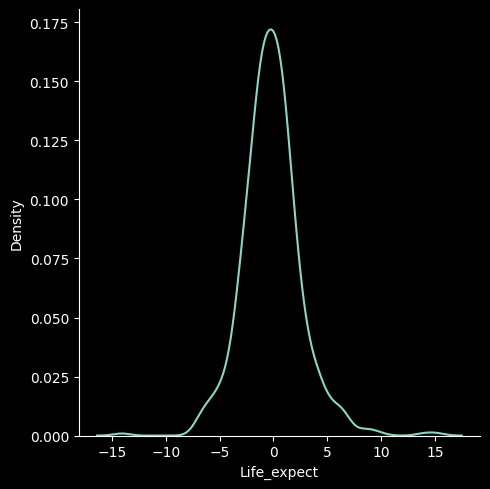

In [72]:
## normality of residues
sns.displot(y_test-y_pred_tst,kind='kde')

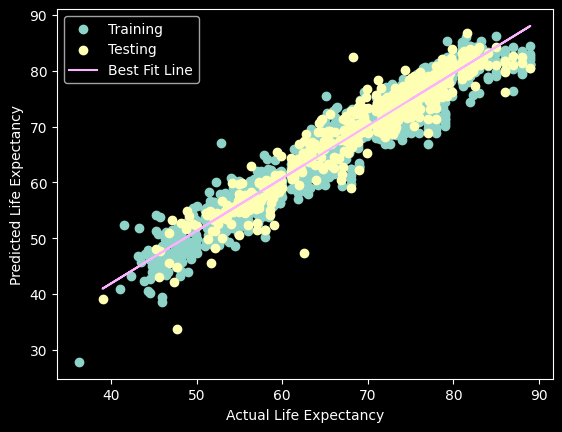

In [73]:
plt.figure()
plt.scatter(y_train,y_pred_tr,label='Training')   # actual data
plt.scatter(y_test,y_pred_tst,label='Testing')
m, b = np.polyfit(y_test, y_pred_tst, 1)
plt.plot(y_test, m * y_test + b, color='#FBB2FF', label='Best Fit Line')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.legend()
plt.show()


## Decision Tree

In [74]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor(max_depth=14,min_samples_split=4,min_samples_leaf=3)
DT.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=14, min_samples_leaf=3, min_samples_split=4)

In [75]:
y_pred_tr=DT.predict(x_train)
y_pred_tst=DT.predict(x_test)

In [76]:
## Testing and Training Accuracy on Decision Tree
from sklearn.metrics import r2_score
print('Accuracy score on Training Data (Decision Tree):',r2_score(y_train,y_pred_tr)*100)
print('Accuracy score on Testing Data (Decision Tree):',r2_score(y_test,y_pred_tst)*100)

Accuracy score on Training Data (Decision Tree): 98.98635485476716
Accuracy score on Testing Data (Decision Tree): 94.03381530607678


In [77]:
DT.get_depth()

14

## Grid Search Cv

In [78]:
# # hyperparameter tuning
# param={'criterion':["squared_error", "friedman_mse", "absolute_error"],\
#        'max_depth':[12,13,14,15,16],\
#        'min_samples_split':[3,4,5,6,7],\
#        'min_samples_leaf':[3,4,5,6,7]}

In [79]:
# from sklearn.model_selection import GridSearchCV
# cv=GridSearchCV(DT,param_grid=param,cv=5,scoring='r2')

In [80]:
# cv.fit(x_train,y_train)

In [81]:
# cv.best_params_

In [82]:
# y_pred_grid=cv.predict(x_train)
# y_pred_gr_tst=cv.predict(x_test)

In [83]:
# print('Training Accuracy (Grid search CV):',r2_score(y_train,y_pred_grid)*100)
# print('Testing Accuracy (Grid search CV):',r2_score(y_test,y_pred_gr_tst)*100)

In [84]:
DT.feature_importances_

array([2.77304945e-03, 7.28480663e-03, 3.49981414e-04, 1.27066219e-01,
       4.64744899e-04, 1.04628100e-02, 3.90288163e-03, 5.05825181e-04,
       1.75093233e-03, 2.61785051e-03, 2.86635987e-02, 3.62078472e-03,
       2.20693983e-03, 2.51822770e-03, 5.99474315e-01, 6.29567869e-04,
       2.52329553e-03, 1.08485724e-03, 7.19579243e-03, 1.91256314e-01,
       3.64720602e-03])

In [85]:
df_imp=pd.DataFrame()
df_imp['Feature']=x.columns
df_imp['Importance']=DT.feature_importances_
df_imp

,Feature,Importance
0,Country,0.002773
1,Year,0.007285
2,Status,0.000350
3,Adult_Mortality,0.127066
4,infant_deaths,0.000465
5,Alcohol,0.010463
6,percentage_expenditure,0.003903
7,HepatitisB,0.000506
8,Measles,0.001751
9,BMI,0.002618


## Random Forest

In [86]:
## Random Forest
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(n_estimators=121)
RF.fit(x_train,y_train)

RandomForestRegressor(n_estimators=121)

In [87]:
 # predicting values fro x_train and x_test
y_pred_tr=RF.predict(x_train)
y_pred_tst=RF.predict(x_test)

In [88]:
## Testing and Training Accuracy on Random Forest
print('Training Accuracy (Random Forest):',r2_score(y_train,y_pred_tr)*100)
print('Testing Accuracy (Random Forest):',r2_score(y_test,y_pred_tst)*100)

Training Accuracy (Random Forest): 99.46992447413247
Testing Accuracy (Random Forest): 96.36472689050967


## Bagging

In [89]:
from sklearn.ensemble import BaggingRegressor
BG=BaggingRegressor(estimator=RandomForestRegressor(),n_estimators=14) 
BG.fit(x_train,y_train)

BaggingRegressor(estimator=RandomForestRegressor(), n_estimators=14)

In [90]:
y_pred_tr=BG.predict(x_train)
y_pred_test=BG.predict(x_test)

In [91]:
print('r2 score on Training data (Bagging):',r2_score(y_train,y_pred_tr)*100)
print('r2 score on Testing data (Bagging):',r2_score(y_test,y_pred_tst)*100)

r2 score on Training data (Bagging): 98.46878775682768
r2 score on Testing data (Bagging): 96.36472689050967


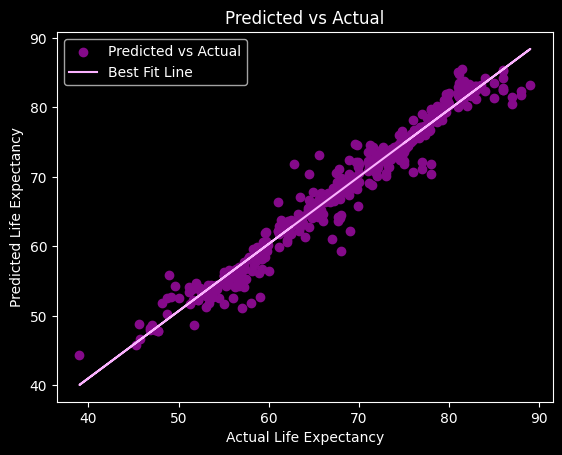

In [92]:
plt.scatter(y_test, y_pred_tst, label='Predicted vs Actual',color='#850A8A')
m, b = np.polyfit(y_test, y_pred_tst, 1)
plt.plot(y_test, m * y_test + b, color='#FBB2FF', label='Best Fit Line')
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Predicted vs Actual")
plt.legend()
plt.show()

## AdaBoost

In [93]:
# from sklearn.ensemble import AdaBoostRegressor
# AB=AdaBoostRegressor()
# AB.fit(x_train,y_train)

In [94]:
# y_pred_tr=AB.predict(x_train)
# y_pred_tst=AB.predict(x_test)

In [95]:
# # Accuracy on Training and Testing data
# print('r2 score on Training data (Adaboost):',r2_score(y_train,y_pred_tr)*100)
# print('r2 score on Testing data (Adaboost):',r2_score(y_test,y_pred_tst)*100)

##  GradientBoosting

In [96]:
from sklearn.ensemble import GradientBoostingRegressor

In [97]:
GB=GradientBoostingRegressor()  
GB.fit(x_train,y_train)

GradientBoostingRegressor()

In [98]:
y_pred_tr=GB.predict(x_train)
y_pred_tst=GB.predict(x_test)

In [99]:
# Accuracy on Training and Testing data
print('r2 score on Training data (GradientBoost):',r2_score(y_train,y_pred_tr)*100)
print('r2 score on Testing data (GradientBoost):',r2_score(y_test,y_pred_tst)*100)

r2 score on Training data (GradientBoost): 96.43071413264227
r2 score on Testing data (GradientBoost): 94.778390317146


## XG Boost

In [100]:
from xgboost import XGBRegressor

In [101]:
XGB=XGBRegressor()  
XGB.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [102]:
y_pred_tr=XGB.predict(x_train)
y_pred_tst=XGB.predict(x_test)

In [103]:
# Accuracy on Training and Testing data
print('r2 score on Training data (XG Boost):',r2_score(y_train,y_pred_tr)*100)
print('r2 score on Testing data (XG Boost):',r2_score(y_test,y_pred_tst)*100)

r2 score on Training data (XG Boost): 99.93722015449872
r2 score on Testing data (XG Boost): 96.72723580992198


## KNN (K nearest neighbors)

In [104]:
from sklearn.neighbors import KNeighborsRegressor

In [105]:
KNN = KNeighborsRegressor(n_neighbors=3)
KNN.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [106]:
y_pred_tr=KNN.predict(x_train)
y_pred_tst=KNN.predict(x_test)

In [107]:
# Accuracy on Training and Testing data
print('r2 score on Training data (KNN):',r2_score(y_train,y_pred_tr)*100)
print('r2 score on Testing data (KNN):',r2_score(y_test,y_pred_tst)*100)

r2 score on Training data (KNN): 94.54825981497164
r2 score on Testing data (KNN): 87.41690047108123


In [108]:
## to find the correct value of k ==>no.of neighbors
error_rate=[]
for i in range(2,30):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(x_train,y_train)
    y_pred=KNN.predict(x_test)
    error_rate.append(np.mean(y_pred!=y_test))
print(error_rate)

[0.9625850340136054, 0.9931972789115646, 0.9863945578231292, 0.9965986394557823, 0.9965986394557823, 1.0, 0.9982993197278912, 0.9982993197278912, 1.0, 1.0, 1.0, 0.9965986394557823, 1.0, 1.0, 0.9982993197278912, 0.9982993197278912, 1.0, 1.0, 1.0, 0.9982993197278912, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


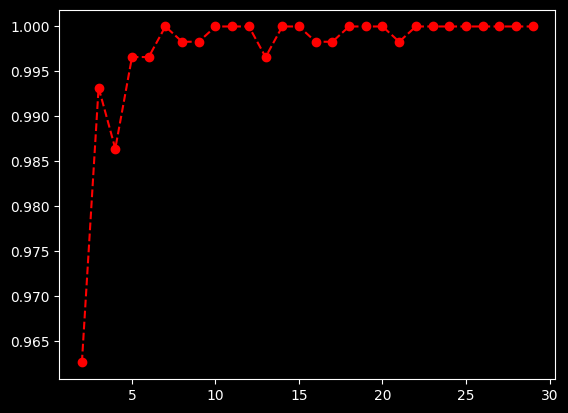

In [109]:
xx=[i for i in range(2,30)]
plt.plot(xx,error_rate,'r--o')

## SVM

In [110]:
from sklearn.svm import SVR
svn=SVR(kernel='linear')
svn.fit(x_train,y_train)

SVR(kernel='linear')

In [111]:
y_pred_tr=svn.predict(x_train)
y_pred_tst=svn.predict(x_test)

In [112]:
print('r2 score on Training data (SVM):',r2_score(y_train,y_pred_tr)*100)
print('r2 score on Testing data (SVM):',r2_score(y_test,y_pred_tst)*100)

r2 score on Training data (SVM): 80.67927452477478
r2 score on Testing data (SVM): 82.16247816481528


## Accuracy table for different models

In [113]:
df_accuracy=pd.DataFrame()
df_accuracy['Model Name']=['linear_regression','ScaledData','Polynomial_regression','Decision_Tree','Random_forest','Bagging','AdaBoost','GradientBoost',\
                               'XGBoost','KNN(K nearest neighbors)','SVM']
df_accuracy['r2_score(Training)']=np.round([81.73236633465265,81.73236633465265,93.40539189744983,98.98635485476716,99.4998172963535,98.43024625948154,\
                                   90.92604126566496,96.43071413264227,99.93722015449872,94.54825981497164,80.67927452477478],2)
df_accuracy['r2_score(Testing)']=np.round([82.27198570231116,82.27198570231116,91.3181603107864,93.86609453192231,96.34479397815686,96.34479397815686,\
                                  90.08230413555552,94.77046638280723,96.72723580992198,87.41690047108123,82.16247816481528],2)
df_accuracy['Error']=100-df_accuracy['r2_score(Testing)']

df_accuracy

,Model Name,r2_score(Training),r2_score(Testing),Error
0,linear_regression,81.73,82.27,17.73
1,ScaledData,81.73,82.27,17.73
2,Polynomial_regression,93.41,91.32,8.68
3,Decision_Tree,98.99,93.87,6.13
4,Random_forest,99.50,96.34,3.66
5,Bagging,98.43,96.34,3.66
6,AdaBoost,90.93,90.08,9.92
7,GradientBoost,96.43,94.77,5.23
8,XGBoost,99.94,96.73,3.27
9,KNN(K nearest neighbors),94.55,87.42,12.58


<Axes: xlabel='Model Name', ylabel='r2_score(Testing)'>

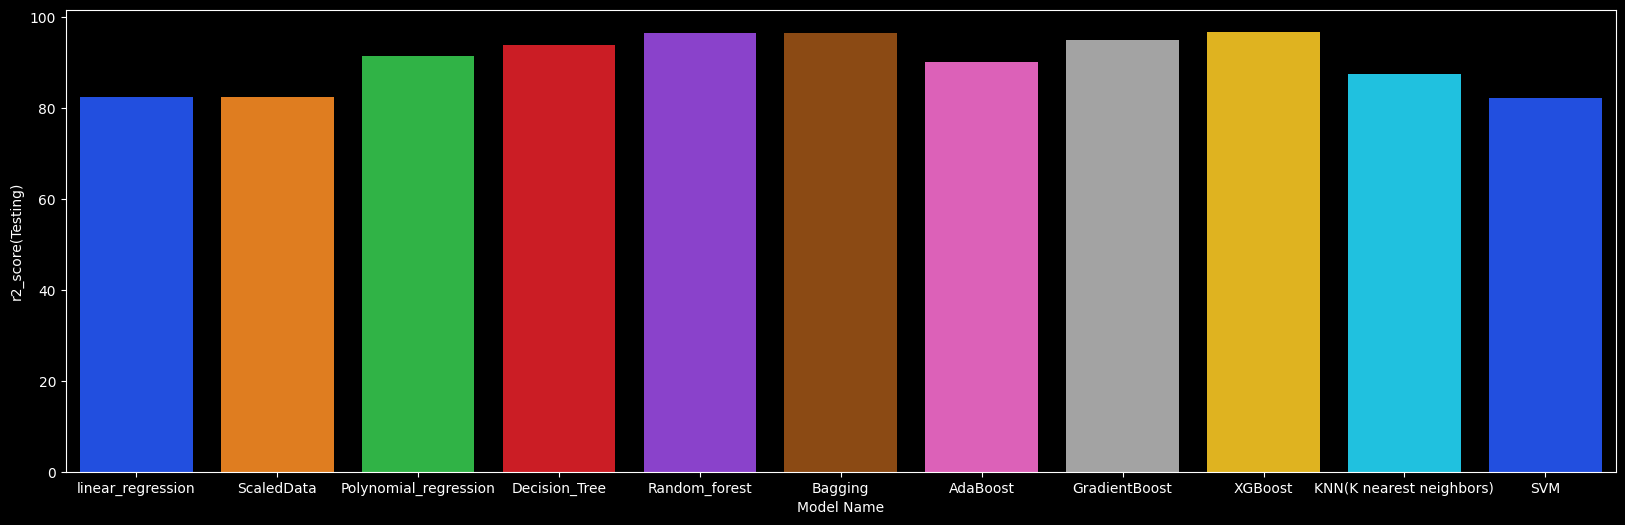

In [114]:
plt.figure(figsize=(20,6))
sns.barplot(x=df_accuracy['Model Name'],y=df_accuracy['r2_score(Testing)'],palette='bright')

## OLS Model

In [114]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as srm
ols_model=srm.OLS(endog=y_train,exog=x_train).fit()

In [115]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Life_expect   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          3.221e+04
Date:                Mon, 15 Jul 2024   Prob (F-statistic):                        0.00
Time:                        22:29:04   Log-Likelihood:                         -6642.7
No. Observations:                2350   AIC:                                  1.333e+04
Df Residuals:                    2329   BIC:                                  1.345e+04
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Country                             0.0036      0.002      2.320      0.020       0.001       0.007
Year                                0.0270      0.000     60.740      0.000       0.026       0.028
Status                             -1.1340      0.309     -3.673      0.000      -1.739      -0.529
Adult_Mortality                    -2.3361      0.110    -21.154      0.000      -2.553      -2.120
infant_deaths                      -0.5616      0.051    -11.098      0.000      -0.661      -0.462
Alcohol                            -0.0147      0.030     -0.495      0.620      -0.073       0.043
percentage_expenditure              0.2594      0.191      1.361      0.174      -0.114       0.633
HepatitisB                         -0.2619      0.054     -4.853      0.000      -0.368      -0.156
Measles                            -0.0020      0.003     -0.757      0.449      -0.007       0.003
BMI                                 0.0364      0.006      6.441      0.000       0.025       0.047
under_five_deaths                   0.0087      0.001      7.471      0.000       0.006       0.011
Polio                               0.3206      0.060      5.316      0.000       0.202       0.439
Total_expenditure                   0.0917      0.039      2.378      0.017       0.016       0.167
Diphtheria                          0.5096      0.061      8.288      0.000       0.389       0.630
HIV_AIDS                           -0.4794      0.019    -24.914      0.000      -0.517      -0.442
GDP                                 0.5248      0.201      2.616      0.009       0.131       0.918
Population                          0.4291      0.100      4.274      0.000       0.232       0.626
thinness_1-19_years                -0.1467      0.055     -2.678      0.007      -0.254      -0.039
thinness_5-9_years                  0.1028      0.054      1.903      0.057      -0.003       0.209
Income_composition_of_resources     7.1409      0.727      9.824      0.000       5.716       8.566
Schooling                           0.5513      0.048     11.382      0.000       0.456       0.646
==============================================================================
Omnibus:                       92.786   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.350
Skew:                          -0.138   Prob(JB):                     1.60e-55
Kurtosis:                       4.581   Cond. No.                     1.73e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Sta

## Prediction on Unseen data

In [116]:
# Prediction of life expectancy
print('Prediction of life expectancy')
new_data=[[87,2001,1,2.163636,77,1.63,-0.369497,84.0,11304,14.7,120,77.0,4.62,8.0,16.9,-0.541582,0.34025,9.0,9.0,0.447,8.4]]
Le_predict=BG.predict(new_data)
print(Le_predict)
# Actual was 53

Prediction of life expectancy
[53.23685714]


In [117]:
print('Prediction of life expectancy')
new_data=[[192,2002,1,-0.738001,25,4.43,-0.371433,73.0,304,26.3,40,73.0,6.53,71.0,39.8,-0.540447,-0.540447,1.2,1.3,0.427,10.0]]
Le_predict=BG.predict(new_data)
print(Le_predict)
# Actual value was 47

Prediction of life expectancy
[48.60957143]


In [118]:
new_data=x.tail(10)
LE_pred=XGB.predict(new_data)
LE_pred

array([49.84852 , 48.217976, 46.707134, 45.429558, 44.623554, 44.37246 ,
       44.488   , 44.965206, 45.365013, 45.956383], dtype=float32)

In [119]:
y.tail(10)

2928    50.0
2929    48.2
2930    46.6
2931    45.4
2932    44.6
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life_expect, dtype: float64

In [120]:
new_data['Life_expectancy_actual']=y.tail(10)

### Actual vs predicted Values

In [121]:
new_data['Life_expectancy_pred']=LE_pred
new_data

,Country,Year,Status,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling,Life_expectancy_actual,Life_expectancy_pred
2928,192,2009,1,3.403651,5.477226,4.64,-0.692846,8.544004,29.206164,29.0,45,8.306624,6.26,8.544004,18.1,-0.936827,-0.287303,7.5,7.4,0.419,9.9,50.0,49.848518
2929,192,2008,1,3.766364,5.477226,3.56,-0.530544,8.660254,0.000000,28.6,46,8.660254,4.96,8.660254,20.5,-0.756659,0.690328,7.8,7.8,0.421,9.7,48.2,48.217976
2930,192,2007,1,-0.787697,5.385165,3.88,-0.489583,8.485281,15.556349,28.2,46,8.544004,4.47,8.544004,23.7,-0.722592,-0.295438,8.2,8.2,0.414,9.6,46.6,46.707134
2931,192,2006,1,-1.271314,5.291503,4.57,-0.471588,8.246211,14.560220,27.9,45,8.426150,5.12,2.645751,26.8,-0.714580,0.667146,8.6,8.6,0.408,9.5,45.4,45.429558
2932,192,2005,1,4.451488,5.291503,4.14,-0.604376,8.062258,20.493902,27.5,43,8.306624,6.44,8.246211,30.3,-0.701468,-0.605403,9.0,9.0,0.406,9.3,44.6,44.623554
2933,192,2004,1,4.499850,5.196152,4.36,-0.739528,8.246211,5.567764,27.1,42,8.185353,7.13,8.062258,33.6,-0.697362,0.648357,9.4,9.4,0.407,9.2,44.3,44.372459
2934,192,2003,1,4.435368,5.099020,4.06,-0.739528,2.645751,31.591138,26.7,41,2.645751,6.52,8.246211,36.7,-0.697794,0.640500,9.8,9.9,0.418,9.5,44.5,44.487999
2935,192,2002,1,-0.739335,5.000000,4.43,-0.739528,8.544004,17.435596,26.3,40,8.544004,6.53,8.426150,39.8,-0.946627,-0.607537,1.2,1.3,0.427,10.0,44.8,44.965206
2936,192,2001,1,4.201620,5.000000,1.72,-0.739528,8.717798,23.000000,25.9,39,8.717798,6.16,8.660254,42.1,-0.659163,0.625734,1.6,1.7,0.427,9.8,45.3,45.365013
2937,192,2000,1,4.032354,4.898979,1.68,-0.739528,8.888194,38.509739,25.5,39,8.831761,7.10,8.831761,43.5,-0.659639,0.617730,11.0,11.2,0.434,9.8,46.0,45.956383


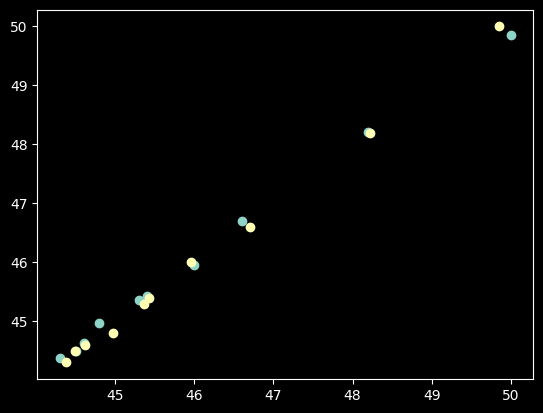

In [122]:
plt.scatter(new_data['Life_expectancy_actual'],new_data['Life_expectancy_pred'])
plt.scatter(new_data['Life_expectancy_pred'],new_data['Life_expectancy_actual'])



## Y data Profiling

In [1]:
# from ydata_profiling import ProfileReport
# profile=ProfileReport(df,title='myfile')
# profile.to_notebook_iframe()